In [1]:
import os
import sys
from pathlib import Path
sys.path.append(os.getcwd())
sys.path.append(str(Path(os.getcwd()).parent))
sys.path.append(os.path.join(os.getcwd(), 'utils'))
from configuration import *
import torch
import pprint
import pNN_Power_Aware as pNN
from utils import *

args = parser.parse_args([])
args = FormulateArgs(args)


In [2]:
%pwd

'/pfs/data5/home/kit/itec/qc0876/projects/PowerAwarePNN/PowerAwarePNN/maincode/PowerAwareBaselineHS'

In [2]:
num_seeds = 10
num_dataset = 13

In [3]:
from tqdm.notebook import tqdm

# results = torch.zeros([num_dataset, num_seeds, 51, 8])
gammas = torch.linspace(0, 1, 51)

# evaluator = Evaluator(args).to(args.DEVICE)

for ds in tqdm(range(num_dataset), desc="Datasets"):
    args.DATASET = ds
    # valid_loader, datainfo = GetDataLoader(args, 'valid', path='../dataset/')
    test_loader, datainfo = GetDataLoader(args, 'test', path='../dataset/')
    print(datainfo)

    for seed in tqdm(range(num_seeds), desc="Seeds", leave=False):

        args.SEED = seed
            
        for g, gamma in enumerate(tqdm(gammas, desc="Gammas", leave=False)):
            # rounded_num = np.round(gamma, 3)
                
            # # Convert to string and remove trailing zeros
            # formatted_num = ('{:.3f}'.format(rounded_num)).rstrip('0')
            # if formatted_num[-1] == '.':
            #     formatted_num += '0'
            
            # # Special case for 0 and 1 to ensure they have one decimal place
            # if rounded_num == 0 or rounded_num == 1:
            #     formatted_num = '{:.1f}'.format(rounded_num)
            # args.powerbalance = formatted_num
            args.powerbalance = int(np.round(gamma, 3)*1e2)
            if args.powerbalance == 58:
                args.powerbalance = 57
            
            # for x, y in valid_loader:
            #     X_valid, y_valid = x.to(args.DEVICE), y.to(args.DEVICE)
            # for x, y in test_loader:
            #     X_test, y_test = x.to(args.DEVICE), y.to(args.DEVICE)

            setup = f"data_{datainfo['dataname']}_seed_{args.SEED}_Penalty_{args.powerestimator}_Factor_{args.powerbalance}"

            model_PT_name = f'./models/pNN_{setup}.model'
            model_FT_name = f'./models/pNN_{setup}_FT.model'
            
            try:
                model_PT = torch.load(model_PT_name)
            except Exception as e:
                print(f"Error loading model_PT: {model_PT_name}")
                print(e)
                continue
            
            try:
                model_FT = torch.load(model_FT_name)
            except Exception as e:
                print(f"Error loading model_FT: {model_FT_name}")
                print(e)
                continue
            
            # acc_valid_pt, power_valid_pt = evaluator(model_PT, X_valid, y_valid)
            # acc_test_pt, power_test_pt = evaluator(model_PT, X_test, y_test)

            # acc_valid_ft, power_valid_ft = evaluator(model_FT, X_valid, y_valid)
            # acc_test_ft, power_test_ft = evaluator(model_FT, X_test, y_test)
            
            # results[ds, seed, g, 0] = acc_valid_pt
            # results[ds, seed, g, 1] = power_valid_pt.cpu().item() * 1000000
            # results[ds, seed, g, 2] = acc_test_pt
            # results[ds, seed, g, 3] = power_test_pt.cpu().item() * 1000000

            # results[ds, seed, g, 4] = acc_valid_ft
            # results[ds, seed, g, 5] = power_valid_ft.cpu().item() * 1000000
            # results[ds, seed, g, 6] = acc_test_ft
            # results[ds, seed, g, 7] = power_test_ft.cpu().item() * 1000000


Datasets:   0%|          | 0/13 [00:00<?, ?it/s]

{'dataname': 'acuteinflammation', 'N_feature': 6, 'N_class': 2, 'N_train': 70, 'N_valid': 23, 'N_test': 25}


Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

{'dataname': 'balancescale', 'N_feature': 4, 'N_class': 3, 'N_train': 373, 'N_valid': 124, 'N_test': 126}


Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

{'dataname': 'breastcancerwisc', 'N_feature': 9, 'N_class': 2, 'N_train': 418, 'N_valid': 139, 'N_test': 140}


Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

{'dataname': 'cardiotocography3clases', 'N_feature': 21, 'N_class': 3, 'N_train': 1274, 'N_valid': 424, 'N_test': 426}


Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

{'dataname': 'energyy1', 'N_feature': 8, 'N_class': 3, 'N_train': 459, 'N_valid': 153, 'N_test': 154}


Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

{'dataname': 'energyy2', 'N_feature': 8, 'N_class': 3, 'N_train': 459, 'N_valid': 153, 'N_test': 154}


Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

{'dataname': 'iris', 'N_feature': 4, 'N_class': 3, 'N_train': 88, 'N_valid': 29, 'N_test': 31}


Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

{'dataname': 'mammographic', 'N_feature': 5, 'N_class': 2, 'N_train': 575, 'N_valid': 191, 'N_test': 193}


Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

{'dataname': 'Pendigits', 'N_feature': 16, 'N_class': 10, 'N_train': 2198, 'N_valid': 732, 'N_test': 733}


Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

{'dataname': 'seeds', 'N_feature': 7, 'N_class': 3, 'N_train': 124, 'N_valid': 41, 'N_test': 43}


Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

{'dataname': 'tictactoe', 'N_feature': 9, 'N_class': 2, 'N_train': 573, 'N_valid': 191, 'N_test': 192}


Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

{'dataname': 'vertebralcolumn2clases', 'N_feature': 6, 'N_class': 2, 'N_train': 184, 'N_valid': 61, 'N_test': 63}


Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

{'dataname': 'vertebralcolumn3clases', 'N_feature': 6, 'N_class': 3, 'N_train': 184, 'N_valid': 61, 'N_test': 63}


Seeds:   0%|          | 0/10 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

Gammas:   0%|          | 0/51 [00:00<?, ?it/s]

In [1]:
torch.save(results, './result.matrix')
torch.save(results, '../RESULT/result.matrix')

NameError: name 'torch' is not defined

In [52]:
import torch

In [53]:
results = torch.load('./result.matrix')

In [54]:
power = results[:,:,:,5]
power.shape

torch.Size([2, 2, 51])

In [55]:
import matplotlib.pyplot as  plt

In [56]:
gammas = torch.linspace(0,1,51)

In [58]:
power[0,0,:] / 1e6

tensor([1.5070e-03, 6.6821e-04, 6.6859e-04, 6.1230e-04, 7.6404e-04, 5.1233e-04,
        4.9599e-04, 4.9051e-04, 7.6393e-04, 6.9126e-04, 4.9383e-04, 6.6875e-04,
        6.6866e-04, 3.9993e-04, 3.8267e-04, 4.0526e-04, 7.6328e-04, 5.7271e-04,
        3.9241e-04, 6.6909e-04, 3.9217e-04, 4.8587e-04, 3.8286e-04, 3.9038e-04,
        6.6842e-04, 5.7311e-04, 6.6868e-04, 4.7713e-04, 3.9302e-04, 0.0000e+00,
        5.8119e-04, 3.8609e-04, 3.8655e-04, 2.8654e-04, 2.8724e-04, 2.9854e-04,
        2.9245e-04, 5.7246e-04, 1.9646e-04, 3.8633e-04, 3.8586e-04, 4.8103e-04,
        2.8863e-04, 4.8150e-04, 1.9385e-04, 3.2373e-06, 2.8706e-04, 9.7687e-05,
        1.9332e-04, 8.3432e-07, 9.1853e-07])

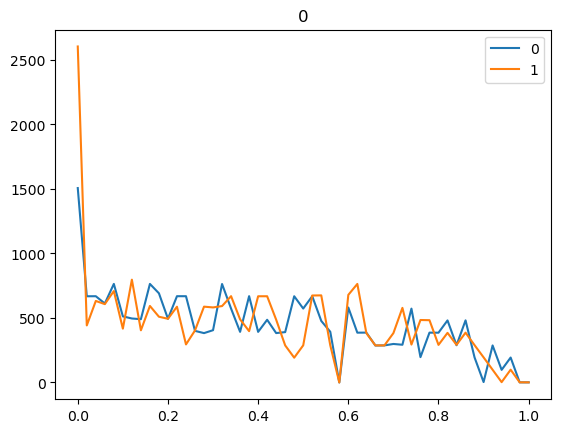

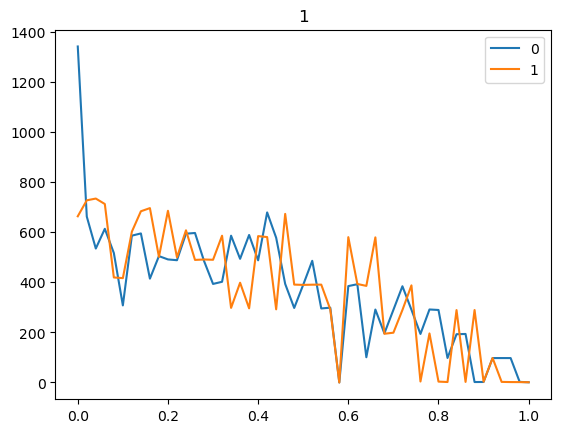

In [59]:
for i in range(num_dataset):
    plt.figure()
    for seed in range(num_seeds):
        plt.plot(gammas, power[i,seed,:], label=f'{seed}')
        plt.title(f'{i}')
        plt.legend()

In [60]:
min_power = [0.] * 13
max_power = [1000., 1200., 2000., 2500., 1500., 1500., 1000., 1500., 3000., 1400., 1700., 1400., 1200.]

In [61]:
power = torch.stack([torch.tensor(min_power), torch.tensor(max_power)])

In [62]:
power.shape

torch.Size([2, 13])

In [63]:
delta = (power[1] - power[0]) / 5
delta

tensor([200., 240., 400., 500., 300., 300., 200., 300., 600., 280., 340., 280.,
        240.])

In [64]:
target = torch.stack([delta * i for i in range(1,5)])
target

tensor([[ 200.,  240.,  400.,  500.,  300.,  300.,  200.,  300.,  600.,  280.,
          340.,  280.,  240.],
        [ 400.,  480.,  800., 1000.,  600.,  600.,  400.,  600., 1200.,  560.,
          680.,  560.,  480.],
        [ 600.,  720., 1200., 1500.,  900.,  900.,  600.,  900., 1800.,  840.,
         1020.,  840.,  720.],
        [ 800.,  960., 1600., 2000., 1200., 1200.,  800., 1200., 2400., 1120.,
         1360., 1120.,  960.]])

In [65]:
target.shape

torch.Size([4, 13])